### LAB - 11 SHOPPING MALL CUSTOMER SEGMENTATION USING CLUSTERING 

#### STEP -1:UNDERSTAND DATA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.size

1000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

#### STEP 2 LABEL ENCODE  GENDER

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre']= label_encoder.fit_transform(df['Genre'])
df['Genre'].unique()

array([1, 0])

#### STEP 3 CHECK FOR VARIANCE

In [10]:
df.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [12]:
df.var()

CustomerID                3350.000000
Genre                        0.247638
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [13]:
df.corr()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Genre,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


#### STEP 4 CHECK SKEWNESS 

In [14]:
df.skew()

CustomerID                0.000000
Genre                     0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

#### STEP 5 PAIR PLOT 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

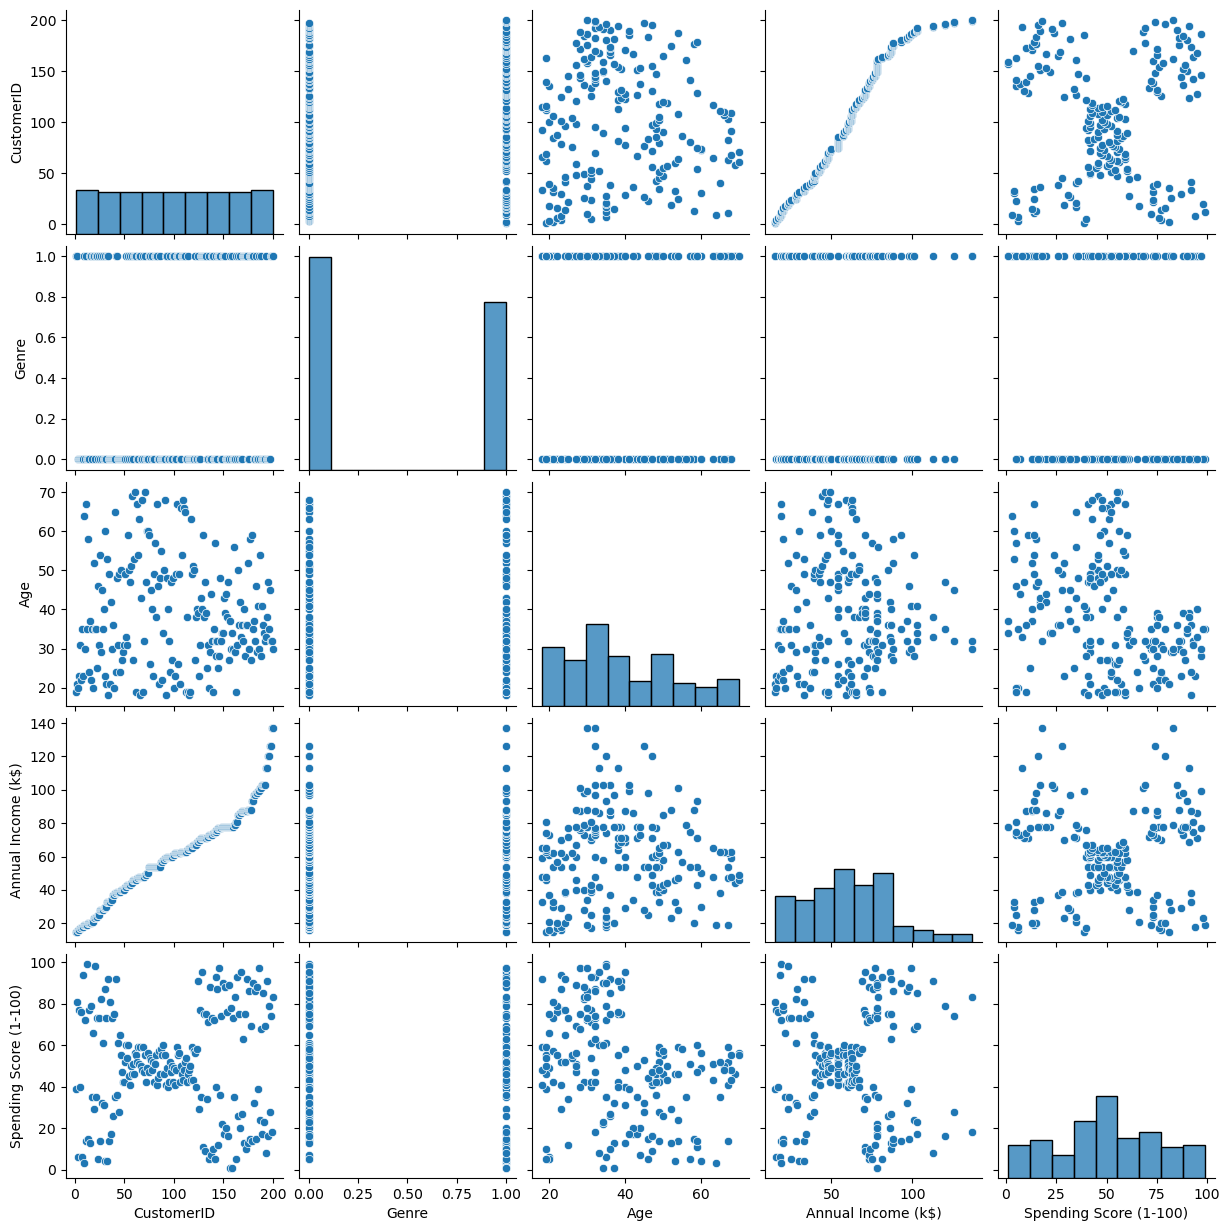

In [16]:
sns.pairplot(data=df)

#### STEP6 BUILD KMEANS

In [17]:
from sklearn.cluster import KMeans

In [18]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [19]:
KM = KMeans(n_clusters=5)

In [20]:
KM.fit(df)

KMeans(n_clusters=5)

In [21]:
KM.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [22]:
print(KM.cluster_centers_)

[[ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.4125     42.9375     55.0875     49.7125    ]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]]


#### STEP 7 SCATTER PLOT

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=KM.labels_)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

#### STEP 8: CLUSTER ANALYSIS

In [25]:
kmeans2 = KMeans(n_clusters = 5, init='k-means++')
kmeans2.fit(df)
pred = kmeans2.predict(df)

In [26]:
frame = pd.DataFrame(df)
frame['cluster'] = pred

In [27]:
frame.cluster.value_counts()

0    79
1    39
2    36
4    23
3    23
Name: cluster, dtype: int64

In [28]:
frame

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


In [29]:
C0 = df[df['cluster'] == 0]
C1 = df[df['cluster'] == 1]
C2 = df[df['cluster'] == 2]
C3 = df[df['cluster'] == 3]
C4 = df[df['cluster'] == 4]

In [30]:
import statistics as ss
print('Average Age : ',C0['Age'].mean())
print('Average Annual Income : ',C0['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C0['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C0.shape)
print('From those Customers We have',C0.Genre.value_counts()[1],'male and',C0.Genre.value_counts()[0],'female')

Average Age :  43.08860759493671
Average Annual Income :  55.29113924050633
Deviation of the mean for annual Income :  8.710665285219767
No. of Customers ie shape : (79, 5)
From those Customers We have 33 male and 46 female


In [31]:
print('Average Age : ',C1['Age'].mean())
print('Average Annual Income : ',C1['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C1['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C1.shape)
print('From those Customers We have',C1.Genre.value_counts()[1],'male and',C1.Genre.value_counts()[0],'female')

Average Age :  32.69230769230769
Average Annual Income :  86.53846153846153
Deviation of the mean for annual Income :  16.312484972924967
No. of Customers ie shape : (39, 5)
From those Customers We have 18 male and 21 female


In [32]:
print('Average Age : ',C2['Age'].mean())
print('Average Annual Income : ',C2['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C2['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C2.shape)
print('From those Customers We have',C2.Genre.value_counts()[1],'male and',C2.Genre.value_counts()[0],'female')

Average Age :  40.666666666666664
Average Annual Income :  87.75
Deviation of the mean for annual Income :  16.387059354433127
No. of Customers ie shape : (36, 5)
From those Customers We have 19 male and 17 female


In [33]:
print('Average Age : ',C3['Age'].mean())
print('Average Annual Income : ',C3['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C3['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C3.shape)
print('From those Customers We have',C3.Genre.value_counts()[1],'male and',C3.Genre.value_counts()[0],'female')

Average Age :  25.52173913043478
Average Annual Income :  26.304347826086957
Deviation of the mean for annual Income :  7.893811054517766
No. of Customers ie shape : (23, 5)
From those Customers We have 9 male and 14 female


In [34]:
print('Average Age : ',C4['Age'].mean())
print('Average Annual Income : ',C4['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C4['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C4.shape)
print('From those Customers We have',C4.Genre.value_counts()[1],'male and',C4.Genre.value_counts()[0],'female')

Average Age :  45.21739130434783
Average Annual Income :  26.304347826086957
Deviation of the mean for annual Income :  7.893811054517766
No. of Customers ie shape : (23, 5)
From those Customers We have 9 male and 14 female


#### STEP 9 FIND THE BEST NUMBER OF CLUSTERS

In [35]:
SSE=[]
for clust in range(1,20):
    km=KMeans(n_clusters=clust,init="k-means++")
    km=km.fit(df)
    SSE.append(km.inertia_)

In [36]:
plt.plot(np.arange(1,20), SSE,'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Inertia')

#### STEP10: REDUCE DIMESNSION USING PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)
_PCA = pca.fit_transform(df)
PCA_Components = pd.DataFrame(_PCA)

In [39]:
PCA_Components

,0,1
0,-32.143713,-32.800607
1,0.344447,-56.858392
2,-57.542776,-12.749095
3,-2.564982,-53.473900
4,-32.428107,-30.185032
...,...,...
195,58.556418,30.615100
196,20.339509,66.300010
197,58.773528,37.941782
198,21.495283,79.221247


In [40]:
KM1 = KMeans(n_clusters=5)
KM1.fit(PCA_Components)
KM1.cluster_centers_

array([[ -4.40334492,  -3.06006101],
       [ 41.56157455,   1.58612627],
       [  4.63371588, -46.71835899],
       [-44.49880901,  -9.76302502],
       [ -9.94989019,  42.39469271]])

In [41]:
KM1.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

#### STEP11: SCATTER PLOT

In [42]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=KM1.labels_)

<AxesSubplot:xlabel='Number of Clusters', ylabel='Inertia'>

#### STEP12: MEAN SHIFT CLUSTERING

In [43]:
from sklearn.cluster import MeanShift, AgglomerativeClustering

In [44]:
MS = MeanShift(bandwidth = 50)
MS.fit(PCA_Components)
MS.cluster_centers_

array([[ 0.32679443, -4.10595116]])

In [45]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=KM1.labels_)

<AxesSubplot:xlabel='Number of Clusters', ylabel='Inertia'>

#### STEP13: PREDICT HIERARCHICAL CLUSTERS USING AGGLOMERATIVE CLUSTERING

In [46]:
AC = AgglomerativeClustering(n_clusters = 5, linkage='ward',compute_full_tree=True)
AC.fit(df)

AgglomerativeClustering(compute_full_tree=True, n_clusters=5)

In [47]:
AC.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [48]:
df['Cluster'] = AC.labels_

In [49]:
import scipy.cluster.hierarchy as sch

In [50]:
from scipy.cluster import hierarchy

In [51]:
Z = hierarchy.linkage(df[:30], 'ward')
plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(Z)

#### STEP14: VISUALIZE SCATTER PLOT WITH HUE AS AGGLOMERATIVECLUSTERING LABELS

In [52]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=AC.labels_)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>